# <center> Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning

<center> Author Arya Octavian

---

# Import Dataset

## Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (12, 8)
rcParams['lines.linewidth'] = 3
rcParams['axes.titlesize'] = 'x-large'
rcParams['xtick.labelsize'] = 'medium'
rcParams['ytick.labelsize'] = 'medium'

## Dataset

In [3]:
df = pd.read_csv("marketing_campaign_data.csv")
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [5]:
# Drop Unnamed: 0 column

df.drop(['Unnamed: 0'],axis=1,inplace=True)

## Missing Values

In [6]:
# Checking features with missing value and sort them by quantity of the missing value

df.isnull().sum().sort_values(ascending=False)[:10]

Income               24
ID                    0
NumDealsPurchases     0
Z_Revenue             0
Z_CostContact         0
Complain              0
AcceptedCmp2          0
AcceptedCmp1          0
AcceptedCmp5          0
AcceptedCmp4          0
dtype: int64

- Karena nilai null pada fitur `income` hanya 24 dari 2240 atau sekitar 1.07% yang mana terbilang sangat sedikit maka baris tersebut dapat kita langsung hapus

In [7]:
df = df.dropna()
df.shape

(2216, 29)

## Check Duplicated Data

In [8]:
df.duplicated().any()

False

## Categorical Numerical Split

In [9]:
nums = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 
        'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

cats =['Education','Marital_Status',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 
       'Complain', 'Response']

## Handling Outliers

### Numerical Features

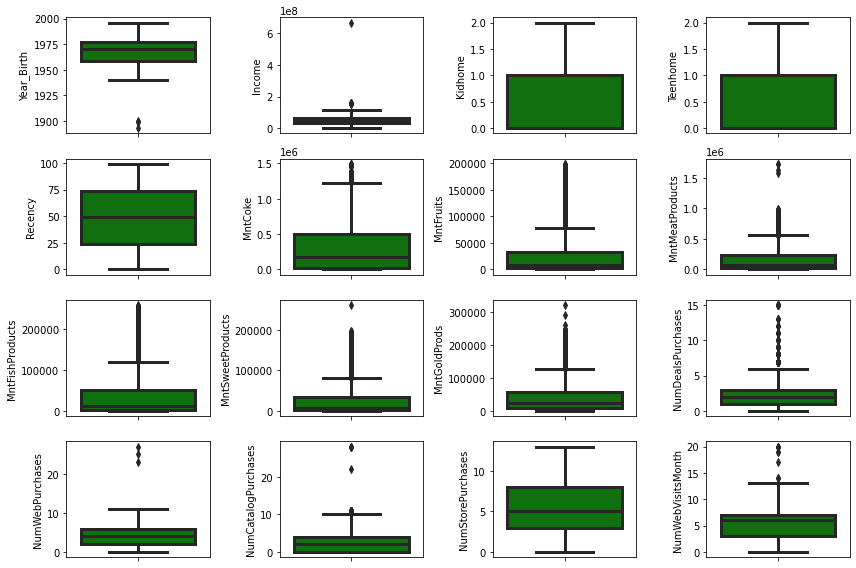

In [10]:
for i in range(len(nums)):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[nums[i]],color='g',orient='h')
    plt.tight_layout()

- Terdapat beberapa outliers pada dataset, namun dibiarkan terlebih dahulu agar data yang diproses original

In [11]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['Year_Birth','Income','NumCatalogPurchases']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 2216
Jumlah baris setelah memfilter outlier: 2185


### Categorical Features

In [12]:
for col in cats:
    print(f'value counts of column {col}')
    print(df[col].value_counts())
    print('---'*10, '\n')

value counts of column Education
S1     1099
S3      473
S2      361
D3      198
SMA      54
Name: Education, dtype: int64
------------------------------ 

value counts of column Marital_Status
Menikah        846
Bertunangan    564
Lajang         469
Cerai          229
Janda           74
Duda             3
Name: Marital_Status, dtype: int64
------------------------------ 

value counts of column AcceptedCmp1
0    2048
1     137
Name: AcceptedCmp1, dtype: int64
------------------------------ 

value counts of column AcceptedCmp2
0    2155
1      30
Name: AcceptedCmp2, dtype: int64
------------------------------ 

value counts of column AcceptedCmp3
0    2026
1     159
Name: AcceptedCmp3, dtype: int64
------------------------------ 

value counts of column AcceptedCmp4
0    2021
1     164
Name: AcceptedCmp4, dtype: int64
------------------------------ 

value counts of column AcceptedCmp5
0    2030
1     155
Name: AcceptedCmp5, dtype: int64
------------------------------ 

value counts o

- Tidak terdapat value yang unclear pada kolom kategorikal

# EXPLORATORY DATA ANALYSIS

## Statistical Summary

In [13]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2185.000000,2185.000000,2.185000e+03,2185.000000,2185.000000,2185.000000,2.185000e+03,2185.000000,2185.000000,2185.000000,...,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000,2185.0,2185.0,2185.000000
mean,5586.016018,1968.945080,5.141558e+07,0.445767,0.509382,48.962014,3.035922e+05,25985.354691,161610.526316,37569.336384,...,5.362471,0.072769,0.075057,0.070938,0.062700,0.013730,0.009153,3.0,11.0,0.148284
std,3249.668951,11.688991,2.061153e+07,0.537863,0.544729,28.945571,3.365073e+05,39283.285572,212556.122257,54830.790934,...,2.404487,0.259816,0.263544,0.256780,0.242478,0.116394,0.095256,0.0,0.0,0.355462
min,0.000000,1940.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2815.000000,1959.000000,3.496800e+07,0.000000,0.000000,24.000000,2.400000e+04,2000.000000,16000.000000,3000.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5462.000000,1970.000000,5.103900e+07,0.000000,0.000000,49.000000,1.730000e+05,8000.000000,66000.000000,12000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8418.000000,1977.000000,6.778600e+07,1.000000,1.000000,74.000000,5.040000e+05,32000.000000,223000.000000,50000.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,1.137340e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,984000.000000,259000.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [14]:
df[cats].describe()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
count,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000
mean,0.062700,0.013730,0.072769,0.075057,0.070938,0.009153,0.148284
std,0.242478,0.116394,0.259816,0.263544,0.256780,0.095256,0.355462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Engineering

In [15]:
df_new = df.copy()

### Date Features

In [16]:
# Feature of custome's first enrollment
df_new['Dt_Customer']= pd.to_datetime(df_new['Dt_Customer'])

df_new['Year_Join']= df_new['Dt_Customer'].dt.year
df_new['Month_Join']= df_new['Dt_Customer'].dt.month

### Persona Features

In [17]:
# New Persona features
df_new['Age'] = 2022 - df_new['Year_Birth']
df_new['Join_at_Age'] = df_new['Dt_Customer'].dt.year - df_new['Year_Birth']
df_new['Total_Kids'] = df_new['Kidhome'] + df_new['Teenhome']
df_new['Is_Parents'] = np.where(df_new['Total_Kids'] > 0, 1, 0)

### Transaction Features

In [18]:
df_new['Total_Spending'] = df_new['MntCoke'] \
                              + df_new['MntFruits'] \
                              + df_new['MntMeatProducts'] \
                              + df_new['MntFishProducts'] \
                              + df_new['MntSweetProducts'] \
                              + df_new['MntGoldProds']

df_new['Total_Accepted_Campaign'] = df_new['AcceptedCmp1'] \
                                    + df_new['AcceptedCmp2'] \
                                    + df_new['AcceptedCmp3'] \
                                    + df_new['AcceptedCmp4'] \
                                    + df_new['AcceptedCmp5']

# Asumsi : Transaksinya MECE (Mutually Exclusive and Collectively Exhaustive)
df_new['Total_Transaction'] = df_new['NumDealsPurchases'] \
                            + df_new['NumWebPurchases'] \
                            + df_new['NumCatalogPurchases'] \
                            + df_new['NumStorePurchases']

### Conversion Features

In [19]:
def safe_div(x,y):
    if y == 0:
        return 0
    return x / y

df_new['Conversion_Rate'] = df_new.apply(lambda x: safe_div(x['Total_Transaction'],x['NumWebVisitsMonth']), axis=1)

### Group Age Features

In [20]:
# Grouping Reference https://sepakat.bappenas.go.id/wiki/Kelompok_Usia#:~:text=35%2D44%20tahun%3A%20Kelompok%20usia,ke%20atas%3A%20Kelompok%20usia%20lanjut

df_new['Group_Age'] = np.where(df_new['Year_Birth']<=1957,'Lanjut Usia (65 Tahun Ke Atas)',
                               np.where(df_new['Year_Birth']<=1967, 'Usia Pensiun (55-64 Tahun)',
                                        np.where(df_new['Year_Birth']<=1977, 'Pra-Pensiun (45-54 Tahun)',
                                                 np.where(df_new['Year_Birth']<=1987, 'Paruh Baya (35-44 Tahun)',
                                                          np.where(df_new['Year_Birth']<=1997, 'Pekerja Awal (25-34 Tahun)',
                                                                   'Usia Muda (15-24 Tahun)')))))

GA_Order = 'Pekerja Awal (25-34 Tahun)', 'Paruh Baya (35-44 Tahun)', 'Pra-Pensiun (45-54 Tahun)', 'Usia Pensiun (55-64 Tahun)', 'Lanjut Usia (65 Tahun Ke Atas)'
df_new['Group_Age'] = pd.Categorical(df_new['Group_Age'], categories=GA_Order, ordered=True)

df_new.drop(['Year_Birth'],axis=1,inplace=True)

In [21]:
df_new.sample(3)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,Month_Join,Age,Join_at_Age,Total_Kids,Is_Parents,Total_Spending,Total_Accepted_Campaign,Total_Transaction,Conversion_Rate,Group_Age
1424,4086,S1,Menikah,18690000.0,0,0,2012-12-28,77,6000,1000,...,12,63,53,0,0,60000,0,5,0.625000,Usia Pensiun (55-64 Tahun)
776,1072,S3,Lajang,40760000.0,0,1,2013-08-30,64,70000,0,...,8,57,48,1,1,93000,0,8,1.333333,Usia Pensiun (55-64 Tahun)
660,55,S1,Bertunangan,56253000.0,0,1,2012-07-12,83,509000,0,...,7,59,49,1,1,597000,0,22,3.666667,Usia Pensiun (55-64 Tahun)


## Analysis

### Overall Campaign Performance

In [22]:
month = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5,
               'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}
df_monthly = df_new.copy()
df_monthly.Month_Join.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)

month_order = 'Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'
df_monthly['Month_Join'] = pd.Categorical(df_monthly['Month_Join'], categories=month_order, ordered=True)

df_viz1 = df_monthly.groupby(['Year_Join','Month_Join']).agg({'Group_Age' : 'count'}).reset_index()
df_viz1.columns = ['Year_Join','Month_Join','Total_Customer']
df_viz1

,Year_Join,Month_Join,Total_Customer
0,2012,Jan,16
1,2012,Feb,9
2,2012,Mar,20
3,2012,Apr,16
4,2012,May,17
5,2012,Jun,14
6,2012,Jul,23
7,2012,Aug,91
8,2012,Sep,64
9,2012,Oct,80


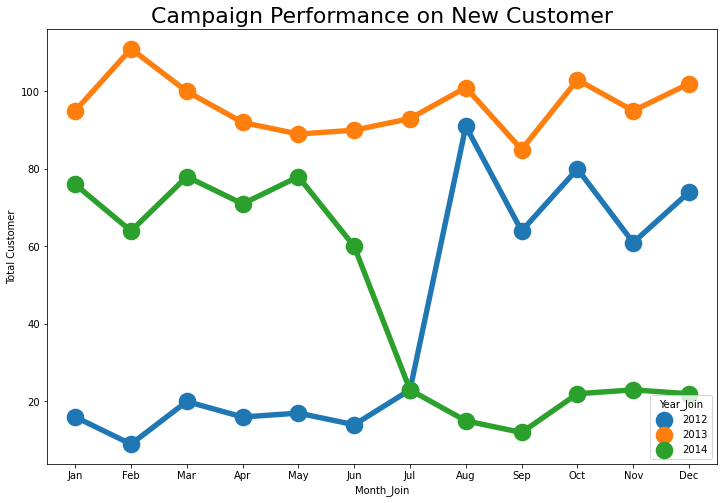

In [23]:
sns.pointplot(x='Month_Join', y="Total_Customer", data=df_viz1, hue="Year_Join")
plt.title("Campaign Performance on New Customer",fontsize=22)
plt.ylabel('Total Customer')
plt.show()

- Pada tahun 2012 di bulan Juli-Agustus campaign yang sedang berjalan waktu itu sukses meningkatkan jumlah customer baru.
- Sedangkan pada tahun 2014 perusahaan mengalami penurunan jumlah customer baru yang bertransaksi.
- Perusahaan dapat mengevaluasi ulang promo seperti apa yang dilakukan pada tahun 2012 dan memungkinkan untuk menerapkannya kembali. Hal ini menjadi penting karena campaign pada waktu tersebut dapat meningkatkan jumlah customer baru sebanyak 400% dari customer baru yang diperoleh di bulan sebelumnya dalam waktu sebulan.

### Income vs Total Spending

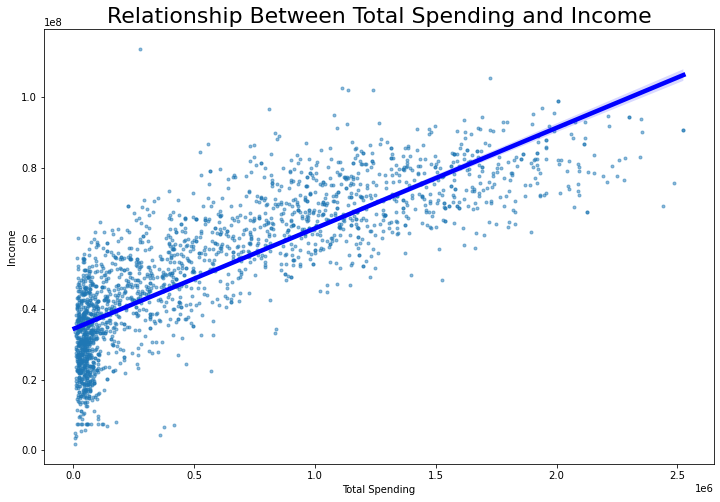

In [24]:
sns.regplot(x='Total_Spending', y='Income', data=df_new, marker=".", scatter_kws={'alpha':0.5}, line_kws={'color':"blue"})
plt.xlabel('Total Spending')
plt.title('Relationship Between Total Spending and Income', size = 22)
plt.show()

- Secara garis besar semakin besar income seorang customer maka cenderung semakin besar juga total spendingnya.
- Hal ini dapat menjadi ide utama bagi perusahaan dalam pembentukan cluster customer yaitu dengan melihat total spending sebagai prioritas.

### Education Level Analysis on Total Transaction

In [25]:
df_viz2 = df_new.groupby(['Education']).agg({'Total_Transaction' : 'sum'}).reset_index()

df_viz2['TransRatio(%)'] = round(df_viz2['Total_Transaction']/df_viz2['Total_Transaction'].sum() * 100, 0)

df_viz2.sort_values(by =['TransRatio(%)'], ascending=False)

,Education,Total_Transaction,TransRatio(%)
1,S1,16341,51.0
3,S3,7460,23.0
2,S2,5367,17.0
0,D3,2778,9.0
4,SMA,379,1.0


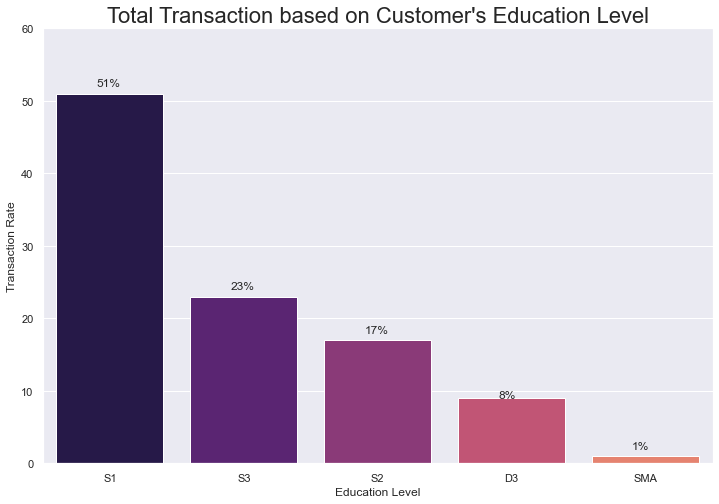

In [26]:
sns.set_theme(style='darkgrid', palette='magma')
sns.barplot(data=df_viz2 , x='Education', y='TransRatio(%)', order=['S1','S3','S2','D3','SMA'])
plt.title("Total Transaction based on Customer's Education Level",fontsize=22)
plt.ylabel('Transaction Rate')
plt.xlabel('Education Level')

plt.annotate(xy=(2.9, 9), text='8%')
plt.annotate(xy=(-0.1, 52), text='51%')
plt.annotate(xy=(1.9, 18), text='17%')
plt.annotate(xy=(0.9, 24), text='23%')
plt.annotate(xy=(3.9, 2), text='1%')
plt.ylim(0,60)

plt.show()

- Customer dengan tingkat edukasi S1 menjadi customer yang paling banyak bertransaksi. Sedangkan customer dengan tingkat edukasi SMA menjadi paling sedikit.
- Hal ini dapat disebabkan oleh dua hal yaitu antara customer S1 sering bertransaksi atau pada kenyataannya jumlah customer S1 jauh lebih banyak.
- Berdasarkan konsep RFM, frekuensi menjadi faktor penting dalam segmentasi customer. Oleh karena itu, customer S1 dapat menjadi prioritas perusahaan untuk ditawari campaign.

### Marital Status Analysis on Total Transaction

In [27]:
df_viz3 = df_new.groupby(['Marital_Status']).agg({'Total_Transaction' : 'sum'}).reset_index()

df_viz3['TransRatio(%)'] = round(df_viz3['Total_Transaction']/df_viz3['Total_Transaction'].sum() * 100, 2)

df_viz3.sort_values(by =['TransRatio(%)'], ascending=False)

,Marital_Status,Total_Transaction,TransRatio(%)
5,Menikah,12525,38.75
0,Bertunangan,8349,25.83
4,Lajang,6684,20.68
1,Cerai,3507,10.85
3,Janda,1220,3.77
2,Duda,40,0.12


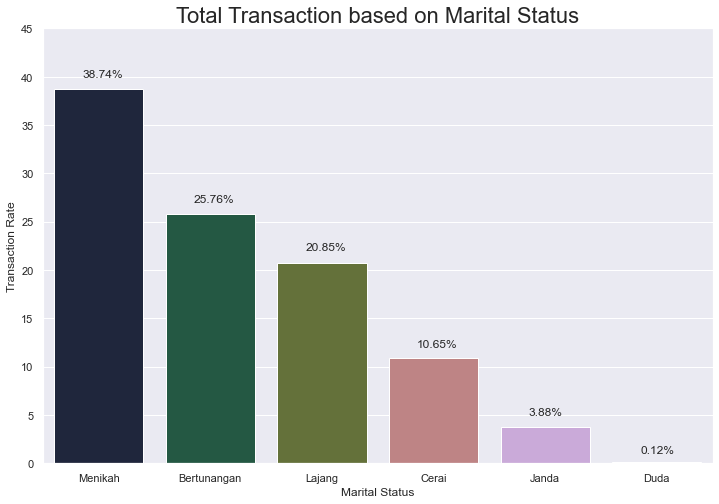

In [28]:
sns.set_theme(style='darkgrid', palette='cubehelix')
sns.barplot(data=df_viz3 , x='Marital_Status', y='TransRatio(%)', order=['Menikah','Bertunangan','Lajang','Cerai','Janda', 'Duda'])
plt.title('Total Transaction based on Marital Status',fontsize=22)
plt.ylabel('Transaction Rate')
plt.xlabel('Marital Status')

plt.annotate(xy=(-0.15, 40), text='38.74%')
plt.annotate(xy=(0.85, 27), text='25.76%')
plt.annotate(xy=(1.85, 22), text='20.85%')
plt.annotate(xy=(2.85, 12), text='10.65%')
plt.annotate(xy=(3.85, 5), text='3.88%')
plt.annotate(xy=(4.85, 1), text='0.12%')
plt.ylim(0,45)

plt.show()

- Customer dengan status menikah merupakan customer yang paling banyak bertransaksi.
- Untuk meningkatkan total transaksi lebih jauh, perusahaan dapat mengambil aksi dengan membuat sistem algoritma rekomendasi yang akan muncul di interface customer saat mengunjungi website atau catalog yang dikirimkan sesuai dengan status pernikahan mereka.

### Group Age Analysis on Total Transaction

In [29]:
df_viz4 = df_new.groupby(['Group_Age']).agg({'Total_Transaction' : 'sum'}).reset_index()

df_viz4['TransRatio(%)'] = round(df_viz4['Total_Transaction']/df_viz4['Total_Transaction'].sum() * 100, 0)
df_viz4

,Group_Age,Total_Transaction,TransRatio(%)
0,Pekerja Awal (25-34 Tahun),1578,5.0
1,Paruh Baya (35-44 Tahun),5426,17.0
2,Pra-Pensiun (45-54 Tahun),10244,32.0
3,Usia Pensiun (55-64 Tahun),7538,23.0
4,Lanjut Usia (65 Tahun Ke Atas),7539,23.0


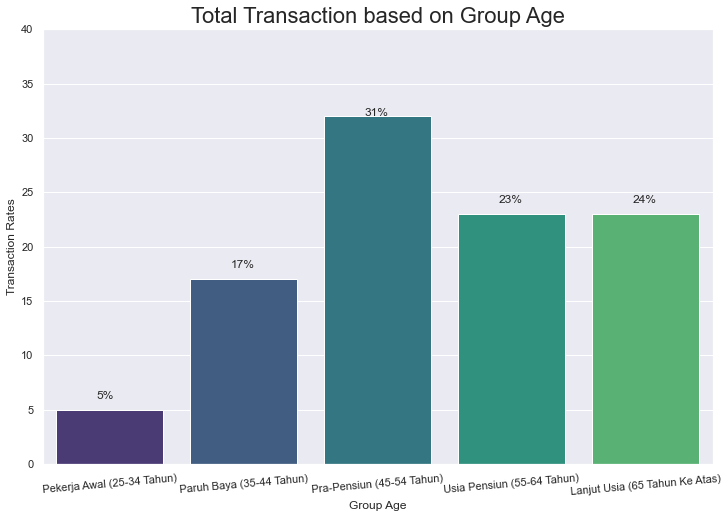

In [30]:
sns.set_theme(style='darkgrid', palette='viridis')
sns.barplot(data=df_viz4 , x='Group_Age', y='TransRatio(%)')
plt.title('Total Transaction based on Group Age',fontsize=22)
plt.ylabel('Transaction Rates')
plt.xlabel('Group Age')
plt.xticks(rotation = 5)

plt.annotate(xy=(2.9, 24), text='23%')
plt.annotate(xy=(-0.1, 6), text='5%')
plt.annotate(xy=(1.9, 32), text='31%')
plt.annotate(xy=(0.9, 18), text='17%')
plt.annotate(xy=(3.9, 24), text='24%')
plt.ylim(0,40)

plt.show()

- Berdasarkan group usia, cutsomer yang paling banyak bertransaksi adalah customer pra-pensiun.
- Insight ini dapat digunakan dalam retargeting campaign untuk meningkatkan jumlah transaksi dengan lebih memfokuskannya pada customer dengan usia 45-54 tahun.

### Response Conversion Rate for Current Campaign

In [31]:
df_viz5 = df_new.groupby(['Group_Age','Response']).agg({'Age' : 'count'}).reset_index()
df_viz5.columns = ['Group_Age', 'Response', 'Total_Customer']

df_viz5['Ratio(%)'] = df_viz5.groupby('Group_Age').apply(lambda x: round(x.Total_Customer/x.Total_Customer.sum() *100, 0)).values
df_viz5

,Group_Age,Response,Total_Customer,Ratio(%)
0,Pekerja Awal (25-34 Tahun),0,102,87.0
1,Pekerja Awal (25-34 Tahun),1,15,13.0
2,Paruh Baya (35-44 Tahun),0,354,83.0
3,Paruh Baya (35-44 Tahun),1,72,17.0
4,Pra-Pensiun (45-54 Tahun),0,605,84.0
5,Pra-Pensiun (45-54 Tahun),1,111,16.0
6,Usia Pensiun (55-64 Tahun),0,421,88.0
7,Usia Pensiun (55-64 Tahun),1,56,12.0
8,Lanjut Usia (65 Tahun Ke Atas),0,379,84.0
9,Lanjut Usia (65 Tahun Ke Atas),1,70,16.0


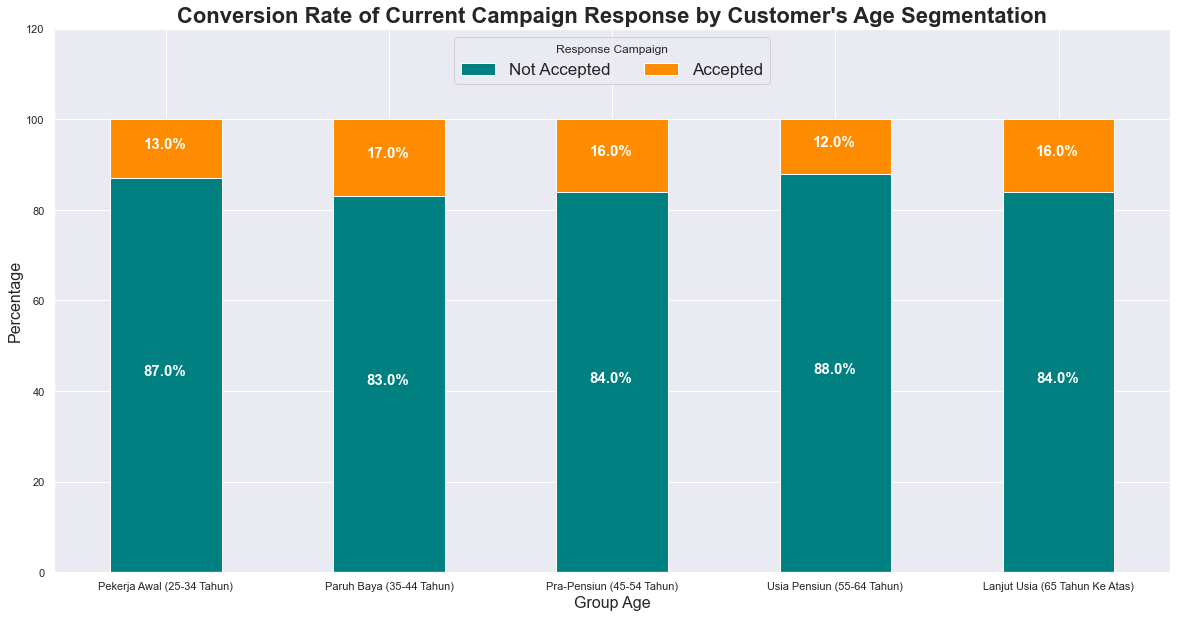

In [32]:
df_viz5_pivot = df_viz5.pivot_table(index='Group_Age', columns='Response', values='Ratio(%)')

df_viz5_pivot.plot(kind='bar', color=['teal','darkorange'], stacked=True, figsize=(20,10))

legend = plt.legend(loc="upper center", ncol=5, title='Response Campaign', fontsize = 17)
legend.get_texts()[0].set_text('Not Accepted')
legend.get_texts()[1].set_text('Accepted')

plt.xlabel('Group Age', fontsize=16)
plt.xticks(rotation=0, ha="center")
plt.ylabel('Percentage', fontsize=16)
plt.title("Conversion Rate of Current Campaign Response by Customer's Age Segmentation", fontsize=22, weight='bold')
plt.ylim(0,120)

for n, x in enumerate([*df_viz5_pivot.index.values]):
    for (proportion, y_loc) in zip(df_viz5_pivot.loc[x],
                                   df_viz5_pivot.loc[x].cumsum()):
                
        plt.text(x=n - 0.10,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion,0)}%', 
                 color="white",
                 fontsize=15,
                 fontweight="bold")

plt.show()

- Meskipun transaksi paling banyak dilakukan oleh customer pra-pensiun, namun untuk conversion rate campaign lebih banyak diterima oleh customer paruh baya.
- Apabila perusahaan ingin meningkatkan metriks keberhasilan sebuah campaign maka customer dengan usia 35-44 tahun dapat menjadi opsi pertama dalam penawaran sebuah campaign.

### Conversion Rate

In [33]:
df_cv = df_new.groupby(['Group_Age']).agg({'Conversion_Rate' : 'mean'}).reset_index()
df_cv['Percentage'] = round(df_cv['Conversion_Rate']/df_cv['Conversion_Rate'].sum() *100,0)
df_cv

,Group_Age,Conversion_Rate,Percentage
0,Pekerja Awal (25-34 Tahun),5.330451,24.0
1,Paruh Baya (35-44 Tahun),3.813542,17.0
2,Pra-Pensiun (45-54 Tahun),3.698660,16.0
3,Usia Pensiun (55-64 Tahun),4.464758,20.0
4,Lanjut Usia (65 Tahun Ke Atas),5.290707,23.0


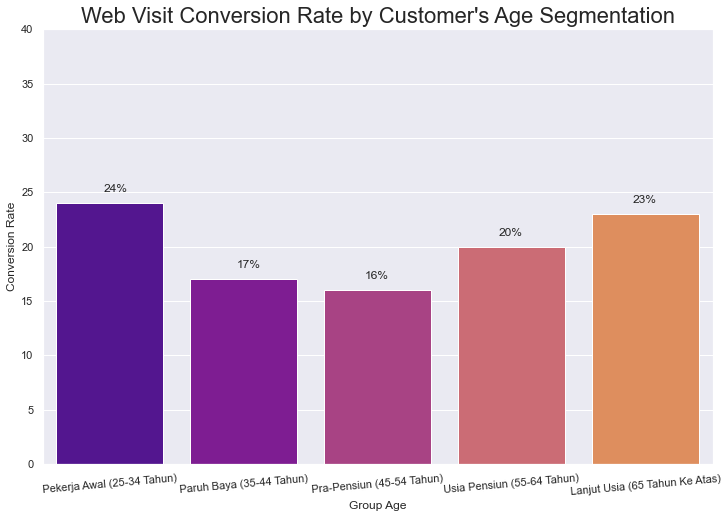

In [34]:
sns.set_theme(style='darkgrid', palette='plasma')
sns.barplot(data=df_cv , x='Group_Age', y='Percentage')
plt.title("Web Visit Conversion Rate by Customer's Age Segmentation",fontsize=22)
plt.xlabel('Group Age')
plt.ylabel('Conversion Rate')
plt.xticks(rotation = 5)

plt.annotate(xy=(-0.05, 25), text='24%')
plt.annotate(xy=(0.95, 18), text='17%')
plt.annotate(xy=(1.9, 17), text='16%')
plt.annotate(xy=(2.9, 21), text='20%')
plt.annotate(xy=(3.9, 24), text='23%')
plt.ylim(0,40)

plt.show()

- Customer yang paling banyak bertransaksi setelah mengunjugi web adalah customer pekerja awal dan lanjut usia.
- Meskipun perbedaan rasio tidak terlalu signifikan bagi semua jenis segmen grup umur, tetapi perusahaan dapat memaksimalkan potensi transaksi melalui website dengan membuat website yang on point dan tidak terlalu banyak fitur.
- Kemudian perusahaan juga dapat menyesuaikan landing page customer sesuai dengan penawaran yang diberikan pada setiap segmen grup umur.

### Group Age Behavior on Purchasing Method

In [35]:
dfp = df_new [["Group_Age", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].groupby(["Group_Age"]).sum().reset_index().sort_values(by=["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"], ascending=False)
dfp

,Group_Age,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
2,Pra-Pensiun (45-54 Tahun),2870,1619,3947
4,Lanjut Usia (65 Tahun Ke Atas),2115,1443,2916
3,Usia Pensiun (55-64 Tahun),2075,1344,2951
1,Paruh Baya (35-44 Tahun),1506,851,2237
0,Pekerja Awal (25-34 Tahun),384,339,662


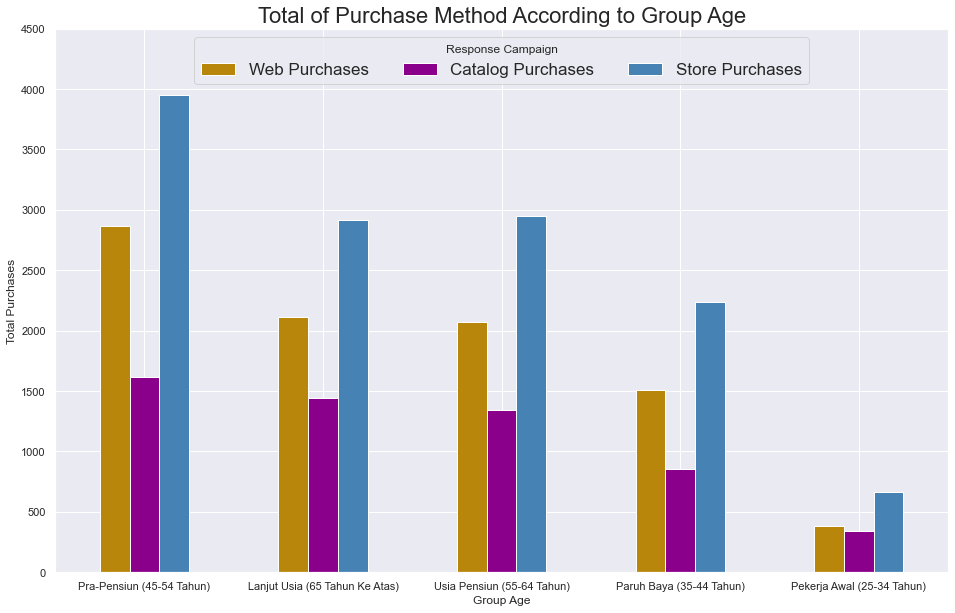

In [36]:
dfp.plot(x="Group_Age", ylabel= "Total Purchases", kind="bar", figsize=(16, 10), legend=True, grid=True , color=['darkgoldenrod','darkmagenta', 'steelblue'])

legend = plt.legend(loc="upper center", ncol=5, title='Response Campaign', fontsize = 17)
legend.get_texts()[0].set_text('Web Purchases')
legend.get_texts()[1].set_text('Catalog Purchases')
legend.get_texts()[2].set_text('Store Purchases')

plt.title("Total of Purchase Method According to Group Age", size = 22)
plt.xlabel('Group Age')
plt.xticks(rotation = 0)
plt.ylim(0,4500)

plt.show()

- Meskipun offline store paling banyak diminati oleh customer, web store juga tetap menjadi tujuan customer untuk berbelanja.
- Untuk meningkatkan pembelian melalui web, perusahaan dapat memberikan promo voucher kupon seperti diskon 10% yang dapat digunakan apabila berbelanja melalui web.
- Selain meningkatkan transaksi, hal ini juga dapat meningkatkan awareness customer dengan website dan perusahaan juga dengan mudah dapat merekomendasikan produk lain pada website tersebut.

# PreProcessing

In [37]:
df_fix = df_new.copy()
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2185 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2185 non-null   int64         
 1   Education                2185 non-null   object        
 2   Marital_Status           2185 non-null   object        
 3   Income                   2185 non-null   float64       
 4   Kidhome                  2185 non-null   int64         
 5   Teenhome                 2185 non-null   int64         
 6   Dt_Customer              2185 non-null   datetime64[ns]
 7   Recency                  2185 non-null   int64         
 8   MntCoke                  2185 non-null   int64         
 9   MntFruits                2185 non-null   int64         
 10  MntMeatProducts          2185 non-null   int64         
 11  MntFishProducts          2185 non-null   int64         
 12  MntSweetProducts         2185 non-

## Feature Selection 1

In [38]:
df_fix = df_fix.drop(['Dt_Customer','Year_Join','Month_Join','Group_Age'],axis=1)

## Feature Encoding

In [39]:
# Label Encoding

df_final = df_fix.copy()

mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4}
df_final['Education_Mapped'] = df_final['Education'].map(mapping_education)

mapping_status = {
    'Lajang' : 0,
    'Bertunangan' : 1,
    'Menikah' : 2,
    'Cerai' : 3,
    'Janda' : 4,
    'Duda' : 5}
df_final['Marital_Mapped'] = df_final['Marital_Status'].map(mapping_status)

In [40]:
df_final.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,Age,Join_at_Age,Total_Kids,Is_Parents,Total_Spending,Total_Accepted_Campaign,Total_Transaction,Conversion_Rate,Education_Mapped,Marital_Mapped
0,5524,S1,Lajang,58138000.0,0,0,58,635000,88000,546000,...,65,55,0,0,1617000,0,25,3.571429,2,0
1,2174,S1,Lajang,46344000.0,1,1,38,11000,1000,6000,...,68,60,2,1,27000,0,6,1.200000,2,0
2,4141,S1,Bertunangan,71613000.0,0,0,26,426000,49000,127000,...,57,48,0,0,776000,0,21,5.250000,2,1
3,6182,S1,Bertunangan,26646000.0,1,0,26,11000,4000,20000,...,38,30,1,1,53000,0,8,1.333333,2,1
4,5324,S3,Menikah,58293000.0,1,0,94,173000,43000,118000,...,41,33,1,1,422000,0,19,3.800000,4,2


## Standardization

In [41]:
df_final.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Age', 'Join_at_Age', 'Total_Kids',
       'Is_Parents', 'Total_Spending', 'Total_Accepted_Campaign',
       'Total_Transaction', 'Conversion_Rate', 'Education_Mapped',
       'Marital_Mapped'],
      dtype='object')

In [42]:
numerical_features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 
                      'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                      'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                      'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                      'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue',
                      'Age', 'Join_at_Age', 'Total_Kids', 'Total_Spending']

In [43]:
from sklearn.preprocessing import StandardScaler
dataset_scaled = df_final.copy()
ss = StandardScaler()

for col in numerical_features:
    dataset_scaled[col] = ss.fit_transform(dataset_scaled[[col]])
    
display(dataset_scaled.shape, dataset_scaled.head(3))

(2185, 37)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,Age,Join_at_Age,Total_Kids,Is_Parents,Total_Spending,Total_Accepted_Campaign,Total_Transaction,Conversion_Rate,Education_Mapped,Marital_Mapped
0,5524,S1,Lajang,0.326223,-0.828963,-0.935325,0.312312,0.985071,1.579014,1.808828,...,1.022142,0.931362,-1.276369,0,1.703065,0,25,3.571429,2,0
1,2174,S1,Lajang,-0.246112,1.030672,0.900870,-0.378798,-0.869696,-0.636176,-0.732259,...,1.278853,1.357885,1.396239,1,-0.957575,0,6,1.200000,2,0
2,4141,S1,Bertunangan,0.980133,-0.828963,-0.935325,-0.793464,0.363843,0.585998,-0.162867,...,0.337581,0.334230,-1.276369,0,0.295771,0,21,5.250000,2,1


In [44]:
df_ml = dataset_scaled.drop(['ID','Education','Marital_Status'],axis=1)

In [45]:
df_ml.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Join_at_Age', 'Total_Kids', 'Is_Parents', 'Total_Spending',
       'Total_Accepted_Campaign', 'Total_Transaction', 'Conversion_Rate',
       'Education_Mapped', 'Marital_Mapped'],
      dtype='object')

In [46]:
df_ml.shape

(2185, 34)

# Clustering Preparation

## Dimentionality Reduction

In [47]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_ml)

PCA()

- PCA atau Principal Component Analysis merupakan konsep reduksi dimensi yang dilakukan demi memudahkan proses machine learning untuk menentukan algoritma.

In [48]:
pca.explained_variance_ratio_

array([7.04736811e-01, 1.51942287e-01, 2.65176704e-02, 2.05159447e-02,
       1.20659696e-02, 1.05304013e-02, 1.00138927e-02, 9.59069935e-03,
       7.49481368e-03, 7.28918710e-03, 6.41865614e-03, 4.74187087e-03,
       4.45183464e-03, 4.10912810e-03, 3.69174141e-03, 3.36029124e-03,
       3.14972458e-03, 2.86878802e-03, 2.18917826e-03, 1.37023238e-03,
       8.25660511e-04, 6.34956360e-04, 5.26650595e-04, 4.01019977e-04,
       3.38923145e-04, 1.22321385e-04, 8.84693322e-05, 1.28758150e-05,
       1.38984830e-31, 4.33442903e-33, 4.33442903e-33, 4.33442903e-33,
       4.33442903e-33, 2.38350292e-33])

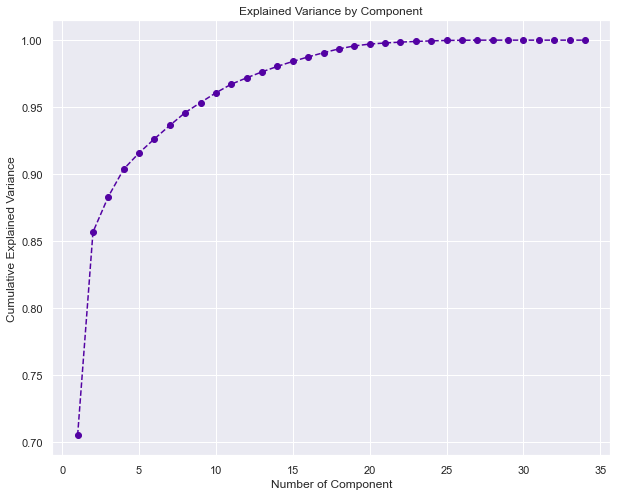

In [49]:
plt.figure(figsize=(10,8))
plt.plot(range(1,35),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance by Component')
plt.xlabel('Number of Component')
plt.ylabel('Cumulative Explained Variance')
plt.show()

- Dari hasil variasi kumulatif rasio dapat diketahui bahwa mereduksi dataset kita menjadi 2 dimensi menggunakan metode pca sudah dapat mewakili 85% variasi nilai pada dataset.
- Dikarenakan treshold kelayakannya ada 80% maka n component pca yang akan dipilih adalah 2 (atau 2 dimensi)

In [50]:
pca = PCA(n_components=2)
pca.fit(df_ml)
df_pca = pca.transform(df_ml)

In [51]:
df_pca = pd.DataFrame(data = df_pca, columns = ['PC 1','PC 2'])
df_pca.describe()

,PC 1,PC 2
count,2.185000e+03,2.185000e+03
mean,3.190938e-16,-3.147241e-16
std,8.466844e+00,3.931402e+00
min,-1.596036e+01,-1.020889e+01
25%,-8.048768e+00,-2.338869e+00
50%,2.195140e-01,-1.332039e-01
75%,7.139228e+00,1.030202e+00
max,2.252270e+01,1.574274e+01


## Elbow Method and Silhouette Score

In [52]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

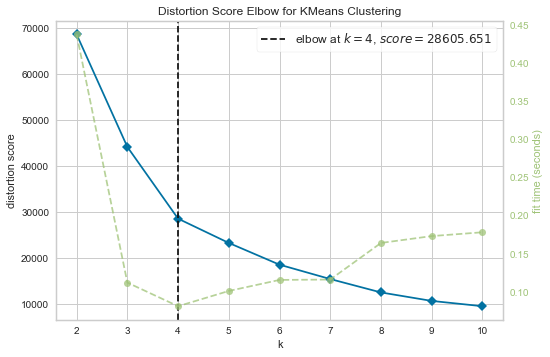

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
Elbow_M = KElbowVisualizer(KMeans(random_state=42),k=10)
Elbow_M.fit(df_pca)
Elbow_M.show()

- Dari hasil di atas, nilai n cluster yang terbaik untuk dataset pca yaitu sebanyak 4 cluster
- Hal ini menyatakan bahwa nantinya customer akan dibagi menjadi 4 kelompok cluster

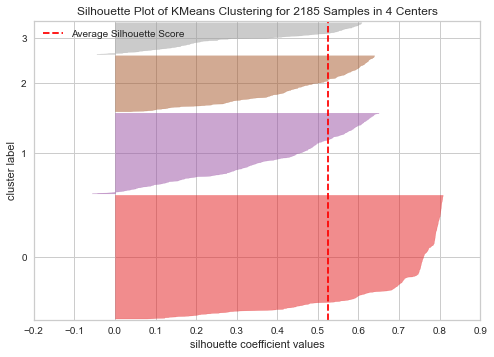

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2185 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [54]:
visualizer = SilhouetteVisualizer(KMeans(n_clusters=4))
visualizer.fit(df_pca)
visualizer.show()

- Nilai silhouette score memiliki rentang nilai dari -1 hingga 1 dimana semakin mendekati 1 maka jumlah cluster akan semakin baik.
- Dari output di atas, penggunaan n cluster 4 untuk dataset pca yang digunakan diprediksi sudah dapat memperoleh nilai silhouette score lebih dari 0.5.

# KMeans Clustering

## Run Model

In [55]:
kmeans = KMeans(n_clusters=4,random_state=42).fit(df_pca)
kmeans.fit(df_pca)

KMeans(n_clusters=4, random_state=42)

In [56]:
df_pca = pd.DataFrame(data=df_pca)
df_pca['k_label'] = kmeans.labels_
df_ml['k_label'] = kmeans.labels_
df_final['k_label'] = kmeans.labels_


df_pca.head()

,PC 1,PC 2,k_label
0,9.886259,-4.177912,0
1,-9.656668,0.666963,1
2,6.386033,-1.301489,2
3,-7.954368,0.173563,1
4,3.411830,-2.350288,2


In [57]:
df_ml.head()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Join_at_Age,Total_Kids,Is_Parents,Total_Spending,Total_Accepted_Campaign,Total_Transaction,Conversion_Rate,Education_Mapped,Marital_Mapped,k_label
0,0.326223,-0.828963,-0.935325,0.312312,0.985071,1.579014,1.808828,2.452298,1.493020,0.868787,...,0.931362,-1.276369,0,1.703065,0,25,3.571429,2,0,0
1,-0.246112,1.030672,0.900870,-0.378798,-0.869696,-0.636176,-0.732259,-0.648859,-0.632988,-0.735250,...,1.357885,1.396239,1,-0.957575,0,6,1.200000,2,0,1
2,0.980133,-0.828963,-0.935325,-0.793464,0.363843,0.585998,-0.162867,1.339530,-0.144250,-0.031039,...,0.334230,-1.276369,0,0.295771,0,21,5.250000,2,1,2
3,-1.202009,1.030672,-0.935325,-0.793464,-0.869696,-0.559790,-0.666379,-0.502923,-0.584114,-0.754812,...,-1.201253,0.059935,1,-0.914067,0,8,1.333333,2,1,1
4,0.333745,1.030672,-0.935325,1.556310,-0.388170,0.433226,-0.205219,0.153793,0.002371,-0.559197,...,-0.945339,0.059935,1,-0.296598,0,19,3.800000,4,2,2


In [58]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

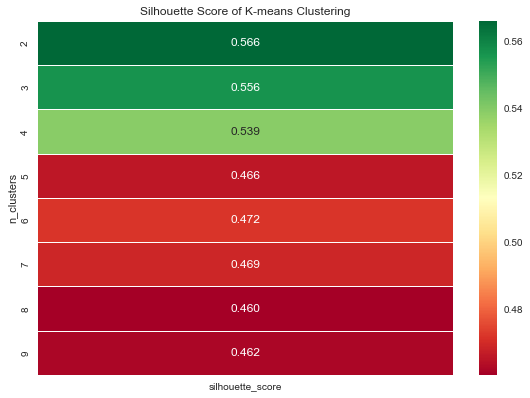

In [59]:
visualize_silhouette_layer(df_pca)

- Nilai evaluasi silhouette score yang diperoleh untuk 4 cluster adalah 0.539 yang mana score ini sudah terbilang sangat bagus.

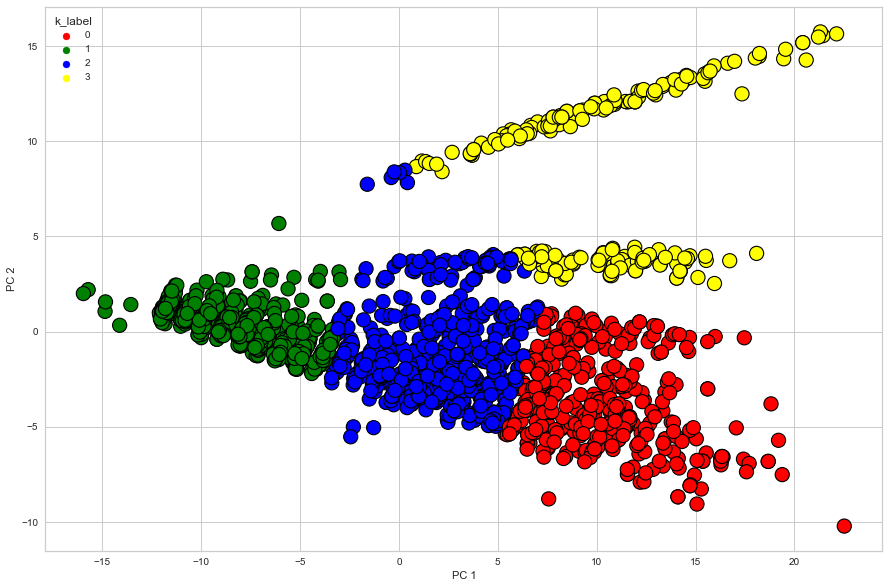

In [60]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df_pca["PC 1"], y=df_pca["PC 2"], hue=df_pca['k_label'],
                s=200, edgecolor='black', palette=['red','green','blue','yellow'])
plt.show()

- Output di atas merupakan visualisasi cluster pada dataset berdasarkan 2 pca yang kita pilih.
- Secara langsung kita dapat melihat tiap batasan antara warna cluster dengan sagat jelas. Hal ini menandakan bahwa model yang dibuat sudah baik.

# Interpretation

In [61]:
df_final

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,Join_at_Age,Total_Kids,Is_Parents,Total_Spending,Total_Accepted_Campaign,Total_Transaction,Conversion_Rate,Education_Mapped,Marital_Mapped,k_label
0,5524,S1,Lajang,58138000.0,0,0,58,635000,88000,546000,...,55,0,0,1617000,0,25,3.571429,2,0,0
1,2174,S1,Lajang,46344000.0,1,1,38,11000,1000,6000,...,60,2,1,27000,0,6,1.200000,2,0,1
2,4141,S1,Bertunangan,71613000.0,0,0,26,426000,49000,127000,...,48,0,0,776000,0,21,5.250000,2,1,2
3,6182,S1,Bertunangan,26646000.0,1,0,26,11000,4000,20000,...,30,1,1,53000,0,8,1.333333,2,1,1
4,5324,S3,Menikah,58293000.0,1,0,94,173000,43000,118000,...,33,1,1,422000,0,19,3.800000,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,S1,Menikah,61223000.0,0,1,46,709000,43000,182000,...,46,1,1,1341000,0,18,3.600000,2,2,2
2236,4001,S3,Bertunangan,64014000.0,2,1,56,406000,0,30000,...,68,3,1,444000,1,22,3.142857,4,1,0
2237,7270,S1,Cerai,56981000.0,0,0,91,908000,48000,217000,...,33,0,0,1241000,1,19,3.166667,2,3,2
2238,8235,S2,Bertunangan,69245000.0,0,1,8,428000,30000,214000,...,58,1,1,843000,0,23,7.666667,3,1,0


In [62]:
df_final_gb = df_final.groupby('k_label')['Income','Total_Spending'].describe()
df_final_gb

Income                                                                 \
         count          mean           std        min         25%         50%   
k_label                                                                         
0        419.0  6.519780e+07  1.121550e+07  7144000.0  57889500.0  64857000.0   
1        925.0  3.352786e+07  1.195456e+07  3502000.0  24882000.0  33456000.0   
2        604.0  5.856410e+07  1.504769e+07  1730000.0  47599750.0  58204500.0   
3        237.0  7.864632e+07  1.019018e+07  4428000.0  72298000.0  79803000.0   

                                 Total_Spending                               \
                75%          max          count          mean            std   
k_label                                                                        
0        72255000.0  105471000.0          419.0  1.106227e+06  407142.109434   
1        41335000.0   76068000.0          925.0  7.959027e+04   75518.537276   
2        69419750.0   95529000.0          604.0  7.461242e+05  500021.319093   
3        83844000.0  113734000.0          237.0  1.356819e+06  453174.177978   

                                                               
              min        25%        50%        75%        max  
k_label                                                        
0        415000.0   799000.0  1021000.0  1384500.0  2486000.0  
1          5000.0    37000.0    58000.0    99000.0  1376000.0  
2          8000.0   368750.0   538500.0  1080000.0  2252000.0  
3        277000.0  1027000.0  1313000.0  1631000.0  2525000.0

In [63]:
reverse_mapping_education = {
    0 :'SMA',
    1 :'D3',
    2 :'S1',
    3 :'S2',
    4 :'S3'}
df_final['Education_Mapped'] = df_final['Education_Mapped'].map(reverse_mapping_education)

reverse_mapping_status = {
    0 : 'Lajang',
    1 : 'Bertunangan',
    2 : 'Menikah',
    3 : 'Cerai',
    4 : 'Janda',
    5 : 'Duda'}
df_final['Marital_Mapped'] = df_final['Marital_Mapped'].map(reverse_mapping_status)

map_cluster = {
    0 : 'Mid Spender',
    1 : 'Risk to Churn',
    2 : 'Low Spender',
    3 : 'High Spender'}
df_final['k_label'] = df_final['k_label'].map(map_cluster)

In [64]:
df_final.sample(5)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,Join_at_Age,Total_Kids,Is_Parents,Total_Spending,Total_Accepted_Campaign,Total_Transaction,Conversion_Rate,Education_Mapped,Marital_Mapped,k_label
1138,10617,S2,Cerai,10979000.0,0,0,34,8000,4000,10000,...,25,0,0,30000,0,8,1.600000,S2,Cerai,Risk to Churn
1823,9166,S1,Menikah,63967000.0,0,1,57,387000,84000,141000,...,45,1,1,882000,0,23,11.500000,S1,Menikah,High Spender
1752,3878,D3,Lajang,31859000.0,1,0,3,3000,4000,7000,...,34,1,1,48000,0,5,0.714286,D3,Lajang,Risk to Churn
2118,6262,S2,Lajang,72217000.0,0,0,93,816000,42000,450000,...,51,0,0,1573000,0,22,11.000000,S2,Lajang,High Spender
1760,2118,D3,Menikah,62905000.0,0,1,68,166000,75000,96000,...,49,1,1,622000,0,20,5.000000,D3,Menikah,Low Spender


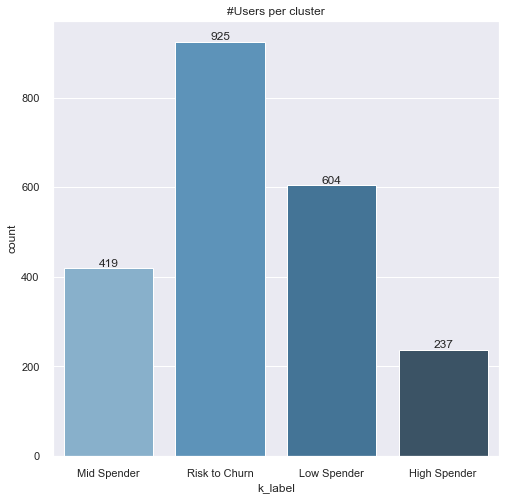

In [65]:
ax = sns.set(rc={'figure.figsize':(8,8)})
ax = sns.countplot(x=df_final['k_label'], palette='Blues_d')
plt.title('#Users per cluster')
ax.bar_label(ax.containers[0])
plt.show()

In [66]:
df_intrepret = df_final.groupby('k_label').agg({'Income' : 'mean',
                                               'Total_Spending' : 'mean',
                                               'Total_Transaction' : 'mean',
                                               'Recency' : 'mean',
                                               'Total_Accepted_Campaign':'mean',
                                               'Conversion_Rate':'mean',
                                               'MntCoke' : 'mean',
                                               'MntMeatProducts' : 'mean',
                                               'MntFishProducts' : 'mean',
                                               'MntSweetProducts' : 'mean',
                                               'MntGoldProds' : 'mean',
                                               'NumDealsPurchases': 'mean',
                                               'NumWebPurchases' : 'mean',
                                               'NumCatalogPurchases'  : 'mean',
                                               'NumStorePurchases' : 'mean',
                                               'NumWebVisitsMonth' : 'mean',
                                               'Age' : 'mean',
                                               'Total_Kids' : 'mean'}).reset_index()
df_intrepret['Total_Kids'] = round(df_intrepret['Total_Kids'],0)
df_intrepret = df_intrepret.sort_values(['Total_Spending'],ascending=False)
df_intrepret

,k_label,Income,Total_Spending,Total_Transaction,Recency,Total_Accepted_Campaign,Conversion_Rate,MntCoke,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_Kids
0,High Spender,7.864632e+07,1.356819e+06,20.476793,49.383966,0.708861,15.512658,574185.654008,468354.430380,96776.371308,73468.354430,78265.822785,1.063291,4.206751,6.118143,9.088608,1.443038,53.590717,0.0
2,Mid Spender,6.519780e+07,1.106227e+06,25.178998,49.730310,0.460621,5.170371,616930.787589,262730.310263,64763.723150,46233.890215,71324.582339,3.460621,7.472554,4.813842,9.431981,5.346062,56.362768,1.0
1,Low Spender,5.856410e+07,7.461242e+05,16.953642,48.857616,0.344371,3.965820,396127.483444,190362.582781,43591.059603,29557.947020,55728.476821,2.774834,5.091060,2.821192,6.266556,5.264901,54.592715,1.0
3,Risk to Churn,3.352786e+07,7.959027e+04,7.223784,48.574054,0.082162,1.257782,31904.864865,18438.918919,6149.189189,4482.162162,14208.648649,1.824865,1.888649,0.459459,3.050811,6.437838,50.415135,1.0


In [67]:
df_interpret2 = df_final.groupby(['k_label','Education']).agg({'Age' : 'count'}).reset_index()
df_interpret2.columns = ['k_label','Education','Total_Customer']
df_interpret2['Percentage(%)'] = df_interpret2.groupby('k_label').apply(lambda x: round(x.Total_Customer/x.Total_Customer.sum() *100, 0)).values
df_interpret2

,k_label,Education,Total_Customer,Percentage(%)
0,High Spender,D3,18,8.0
1,High Spender,S1,134,57.0
2,High Spender,S2,35,15.0
3,High Spender,S3,50,21.0
4,Low Spender,D3,46,8.0
5,Low Spender,S1,305,50.0
6,Low Spender,S2,101,17.0
7,Low Spender,S3,151,25.0
8,Low Spender,SMA,1,0.0
9,Mid Spender,D3,36,9.0


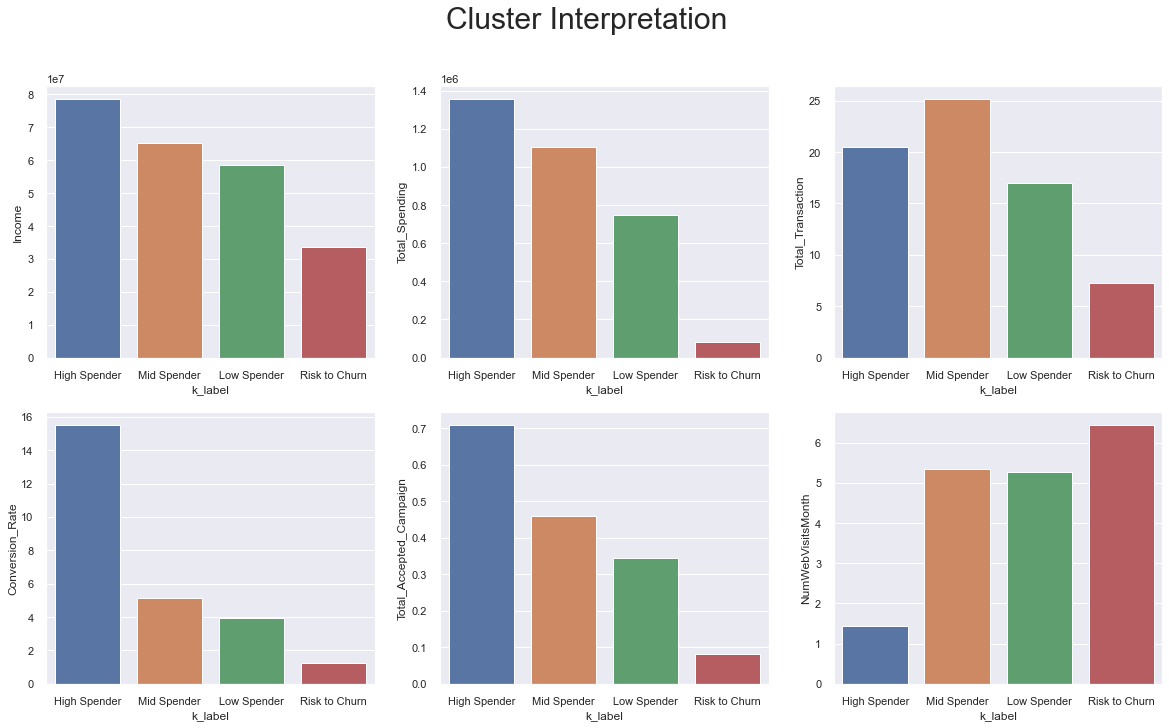

In [68]:
fig, axes = plt.subplots(2, 3, sharex=False, figsize=(20,11))
fig.suptitle('Cluster Interpretation', size = 30)

sns.barplot(ax=axes[0, 0], data=df_intrepret, x='k_label', y='Income')
sns.barplot(ax=axes[0, 1], data=df_intrepret, x='k_label', y='Total_Spending')
sns.barplot(ax=axes[0, 2], data=df_intrepret, x='k_label', y='Total_Transaction')
sns.barplot(ax=axes[1, 0], data=df_intrepret, x='k_label', y='Conversion_Rate')
sns.barplot(ax=axes[1, 1], data=df_intrepret, x='k_label', y='Total_Accepted_Campaign')
sns.barplot(ax=axes[1, 2], data=df_intrepret, x='k_label', y='NumWebVisitsMonth')
plt.show()

## Summary

1. High Spender
- Cluster ini memiliki total customer sebanyak 273 orang dan rata-rata didominasi oleh customer pra-pensiun (45-54 tahun). Selain itu cluster ini juga paling banyak diisi oleh customer dengan tingkat edukasi S1 sebanyak 57% serta tidak ada customer dengan tingkat pendidikan SMA di cluster ini.
- Dilihat dari rata-rata pendapatan dan pengeluaran, cluster ini merupakan yang terbesar yaitu income IDR 78 juta per tahun dengan rata-rata belanja per tahun sebanyak IDR 1.3 juta.
- Customer ini jarang mengunjungi website, namun lebih sering berbelanja melalui store dan catalog. Kemudian customer ini juga paling jarang berbelanja dengan diskon.
- Meskipun begitu, customer cluster ini paling banyak merespon campaign dan memiliki conversion rate yang tinggi. Sehingga perusahaan tidak boleh kehilangan customer ini dengan cara meningkatkan loyalitas belanja pada perusahaan.

2. Mid Spender
- Jumlah customer pada cluster ini adalah 419 orang yang rata-rata didominasi oleh customer usia pensiun (55-64 tahun). Disamping itu, cluster ini 50% nya diisi oleh customer dengan tingkat pendidikan S1 dan hanya 1 orang dengan tingkat pendidikan SMA.
- Rata-rata income pada cluster ini adalah IDR 65 juta per tahun dengan total belanja per tahun sebanyak IDR 1.1 juta.
- Customer ini cukup sering mengunjungi website dengan rata-rata 5 kali sebulan dan paling sering berbelanja melalui website. Terlebih, customer ini merupakan customer yang paling sering belanja di offline store dan paling sering berbelanja dengan promo.
- Antusiasme customer mid spender terhadap campaign terbilang cukup dan conversion rate juga tertinggi kedua. Oleh karena itu, customer cluster ini paling cocok untuk diprioritaskan sebagai target utama campaign maupun promo.

3. Low Spender
- Terdapat 604 orang customer pada cluster ini dan rata-rata didominasi customer pra-pensiun (45-54 tahun). Sebanyak 50% customer dari cluster ini memiliki tingkat pendidikan S1 dan hanya 1 orang yang tingkat pendidikannya SMA.
- Customer low spender memiliki rata-rata income tahunan sebesar IDR 58 juta per tahun dengan total belanja IDR 740 K per tahun.
- Customer ini juga cukup sering mengunjungi website sama seperti cluster mid spender yaitu rata-rata 5 kali sebulan. Metode belanja paling sering digunakan oleh customer low spender adalah website dan offline store.
- Meskipun minat respon campaing dan conversion ratenya rendah, customer low spender memiliki nilai recency yang hampir sama dengan cluster lain. Untuk meningkatkan minat transaksi low spender, perusahan dapat menawarkan promo lebih banyak pada customer low spender.

4. Risk to Churn
- Total customer terbanyak berada pada cluster risk to churn yaitu sebanyak 925 orang customer yang didominasi oleh pra-pensiun (45-54 tahun). Sebanyak 49 % customer merupakan lulusan S1 dan terdapat 52 orang dengan tingkat pendidikan SMA.
- Income rata-rata pada cluster ini sekitar IDR 33 juta per tahun dan belanja hanya sekitar IDR 79 K per tahun.
- Meskipun total belanjanya paling kecil, rata-rata kunjungan website per bulan customer cluster ini paling banyak yaitu sekitar 6 kali dalam sebulan. Customer ini paling tidak berminat berbelanja melalui katalog namun paling sering berbelanja lewat offline store dan dengan menggunakan promo.
- Customer ini sangat tidak antusias dengan campaign yang ada dan conversion ratenya pun paling kecil. Perusahaan dapat mulai mengevaluasi harga pada produk dan mempertimbangkan customer Risk to Churn. Selain menyebarkan promo untuk potongan harga, memberikan variasi produk seperti jenis produk yang lebih murah atau size produk yang lebih sedikit dapat menjadi solusi yang cukup baik.

## Recommendation

- Memonitor dengan ketat transaksi customer `high spender` dan meminta feedback apabila memungkinkan.
- Untuk meningkatkan loyalitas `high spender`, hal pertama dapat dimulai dengan memberika promo loyalty berdasarkan jumlah transaksi tertentu.
- Karena `high spender` lebih sering berbelanja di store, gunakan kartu kredit sebagai media potongan harga. Promo bundling juga menjadi strategi yang cocok. 
- Prioritaskan `mid spender` sebagai penerima campaign atau promo.
- Tekankan promo kupon yang perlu di claim via website kepada `mid spender` dan `low spender` seperti cashback 10% yang hanya dapat digunakan dari tanggal 7-10.
- Membuat sistem rekomendasi di website dengan barang yg direkomendasi adalah barang dengan harga termurah bagi `low spender` dan customer yang `risk to churn`.
- Mengevaluasi harga karena web visit customer `risk to churn` paling tinggi, tetapi kurang melakukan transaksi. Hal ini dapat dilakukan dengan menambah variasi jenis produk dengan harga yang lebih murah atau membuat variasi produk yang lebih murah berdasarkan paketan dengan size atau berat tertentu.
- Customer `risk to churn` sangat tidak berminat pada pembelian dengan katalog maka budget penawaran katalog kepada cluster ini dapat dialihkan untuk promo lain.